In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CodingChallenge_v2/car_imgs_4000.csv')

In [4]:
df = df.iloc[:,:3]

In [5]:
df.columns # 3 columns

Index(['filename', 'perspective_score_hood',
       'perspective_score_backdoor_left'],
      dtype='object')

## Labels exploration

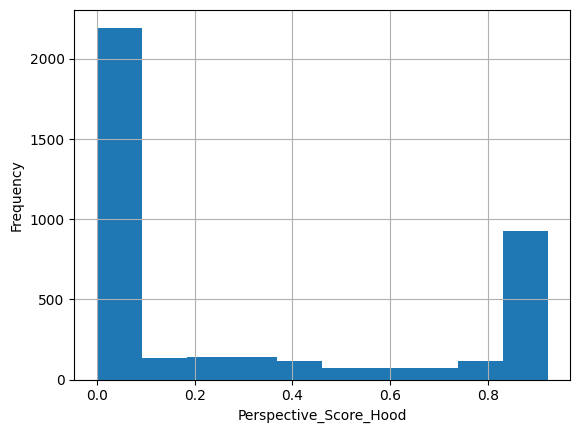

In [6]:
df['perspective_score_hood'].hist()
plt.xlabel('Perspective_Score_Hood')
plt.ylabel('Frequency')
plt.show()

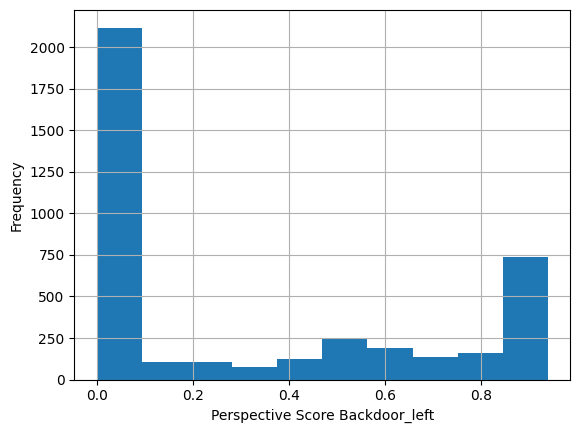

In [7]:
df['perspective_score_backdoor_left'].hist()
plt.xlabel('Perspective Score Backdoor_left')
plt.ylabel('Frequency')
plt.show()

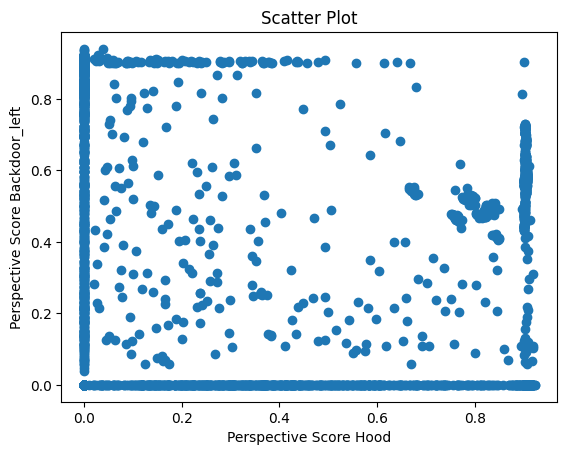

In [8]:
x = df['perspective_score_hood']
y = df['perspective_score_backdoor_left']

# Create a scatter plot
plt.scatter(x, y)

plt.xlabel('Perspective Score Hood')
plt.ylabel('Perspective Score Backdoor_left')


plt.title('Scatter Plot')
plt.show()

# Pretrained models for cars with perspective lables NOT readily available.

#**Approach 1. Vehicle Oreintation** (this approach assumes vehicle direction is an indicator of perspective scores)

- not many datasets readily available regarding vehicle orientation. The following link identifies the orientation but its classification of different discrete views and not regression. https://github.com/sekilab/VehicleOrientationDataset

- the dataset from HUK Coburg: about 75% of dataset contains images with at least one of the 2 lables (or perspective scores) = 0.
- However the angles and perspective score are not well correalted.
- Eg. 45 degree between front and back left door, gets very high perspective scores for both.
- So, realting to these labels using angles may work at best for 75% of dataset, under best circunmstances, which is an overestimate (because the side and front view angles are not directly labeled in the Vehicle Orientation Dataset with classification labels which are discrete and not necessarily directly relate to directions).
- Also not necessary to work well when class balance considered across binned perspective scores.  

## Let us check some assumptions regarding directions and its relation to perspective scores:
- Although directly there appears to be no corelation between the 2 labels

YET

- if the front view is completely visible, then the left side back door shoud ideally be not visible
- if left side back door is visible, then the front view can only be visible to a very small extent.

- Note: If 3 sec per image for manual observation spent; 4000 images = 3.5 hrs.

In [9]:
df1 = df[df['perspective_score_hood']>0.9].copy()

In [10]:
df1 # this is about 25% of the data

filename  perspective_score_hood  \
9     d585fece-5542-4e7e-9e50-bf2be61f4039.jpg                0.903024   
19    10f490ed-8425-4ed1-bf30-6a9d03b236dd.jpg                0.904420   
26    e6c1161b-892b-438c-add6-da84b5454e87.jpg                0.902192   
35    d3ff83fe-ed85-4958-913b-d1a21268d243.jpg                0.905761   
43    a1f59921-873d-4e8e-a616-2c05a883ff3c.jpg                0.904594   
...                                        ...                     ...   
2991  c59058fe-bd0d-4783-86ca-1d82ec9d4ebb.jpg                0.902067   
2992  c91a1aa6-9016-4f5d-a841-f8cf2d9bfa75.jpg                0.901355   
2993  3ee1b585-4246-4e1e-bc2c-b08bc5d5f8c7.jpg                0.903437   
2994  fa1cd5f5-36d4-403d-a4ff-359ceaaeb93a.jpg                0.905344   
2999  310d86ac-b220-4c04-aa03-f1e428f1aab9.jpg                0.905675   

      perspective_score_backdoor_left  
9                            0.000000  
19                           0.000000  
26                           0.000000  
35                           0.000000  
43                           0.000000  
...                               ...  
2991                         0.000000  
2992                         0.500641  
2993                         0.000000  
2994                         0.000000  
2999                         0.000000  

[853 rows x 3 columns]

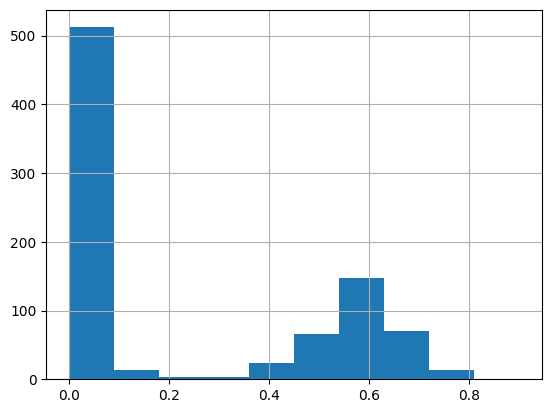

In [11]:
df1['perspective_score_backdoor_left'].hist()
plt.show()

In [12]:
df1[df1['perspective_score_backdoor_left']>0.5]

filename  perspective_score_hood  \
48    d86203d7-39f3-4d48-a715-12617192103d.jpg                0.901699   
75    3e86622c-4b56-4fb7-a3f9-02e34b2d7d11.jpg                0.900724   
80    df98a86b-193f-4378-b15b-f7b490c4e5ad.jpg                0.906201   
100   25b52266-9020-4381-b809-02bef6adf094.jpg                0.904122   
120   8809c075-ba47-40ab-8976-c7bd124edad3.jpg                0.902373   
...                                        ...                     ...   
2962  a9650b1c-7473-472e-b85b-cce6ebcece52.jpg                0.900784   
2971  71e5dc5b-3837-4560-9d03-f255c513aaac.jpg                0.901569   
2978  22c953f2-e55b-4246-9342-c3e7aac06c47.jpg                0.903960   
2990  eb35d4d9-2e86-4f30-b556-ba85cd83841f.jpg                0.902295   
2992  c91a1aa6-9016-4f5d-a841-f8cf2d9bfa75.jpg                0.901355   

      perspective_score_backdoor_left  
48                           0.540793  
75                           0.572524  
80                           0.590894  
100                          0.553735  
120                          0.630390  
...                               ...  
2962                         0.558012  
2971                         0.511314  
2978                         0.565444  
2990                         0.642503  
2992                         0.500641  

[267 rows x 3 columns]

In [13]:
def show_image(image_file):

    # Specify the path to the folder containing the photo
    folder_path = 'imgs'

    # Load the image using the Pillow (PIL) library
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    # Plot the image using Matplotlib
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.imshow(image)
    plt.axis('off')  # Hide the axis ticks and labels
    plt.show()

    score_hood = df[df['filename']==image_file.split('/')[-1]].iloc[0][1] #['perspective_score_hood']
    score_door = df[df['filename']==image_file.split('/')[-1]].iloc[0][2] #['perspective_score_backdoor_left']

    print(f'perspective_score_hood          : {score_hood}')
    print(f'perspective_score_backdoor_left : {score_door}')

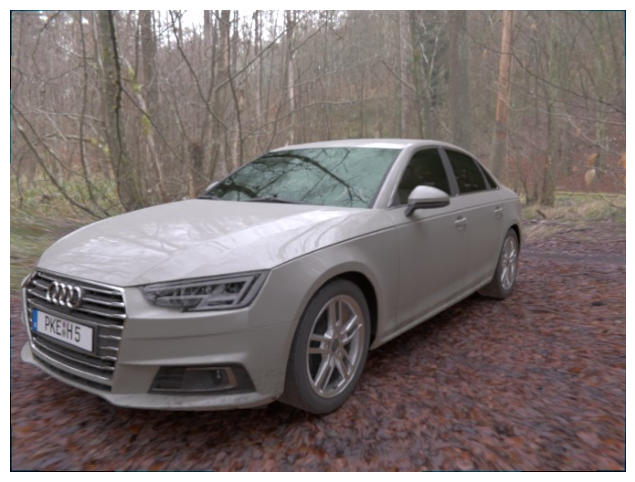

perspective_score_hood          : 0.90135473
perspective_score_backdoor_left : 0.5006415


In [14]:
show_image('/content/drive/MyDrive/CodingChallenge_v2/imgs/c91a1aa6-9016-4f5d-a841-f8cf2d9bfa75.jpg')

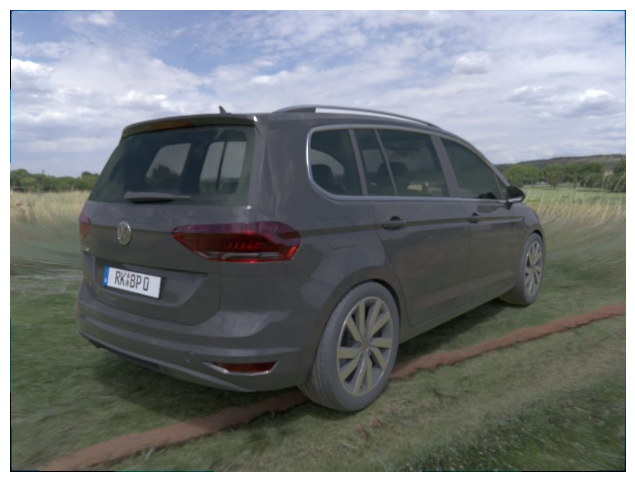

perspective_score_hood          : 0.0
perspective_score_backdoor_left : 0.0


In [15]:
show_image('/content/drive/MyDrive/CodingChallenge_v2/imgs/0012274e-8b56-4996-9001-d9f404bb1299.jpg')

In [16]:
df[df['perspective_score_hood']>0.92]

filename  perspective_score_hood  \
1128  541781fc-7230-4e15-84c1-2a62ff5e0877.jpg                0.922428   
1234  22260ab3-4b19-4fd3-ab75-d68577ce1a35.jpg                0.922220   

      perspective_score_backdoor_left  
1128                              0.0  
1234                              0.0

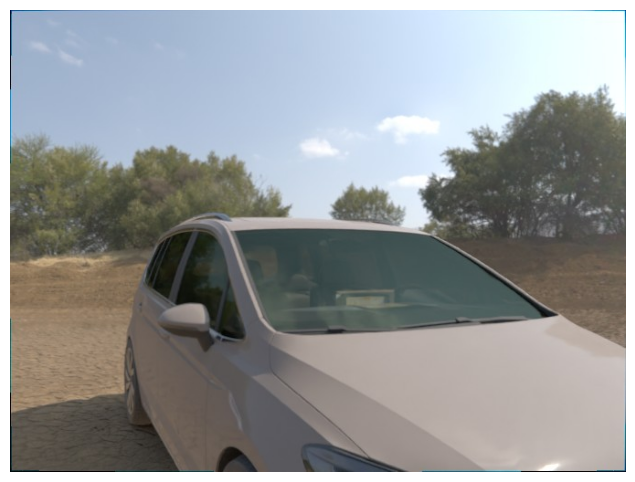

perspective_score_hood          : 0.92242765
perspective_score_backdoor_left : 0.0


In [17]:
show_image('/content/drive/MyDrive/CodingChallenge_v2/imgs/541781fc-7230-4e15-84c1-2a62ff5e0877.jpg')

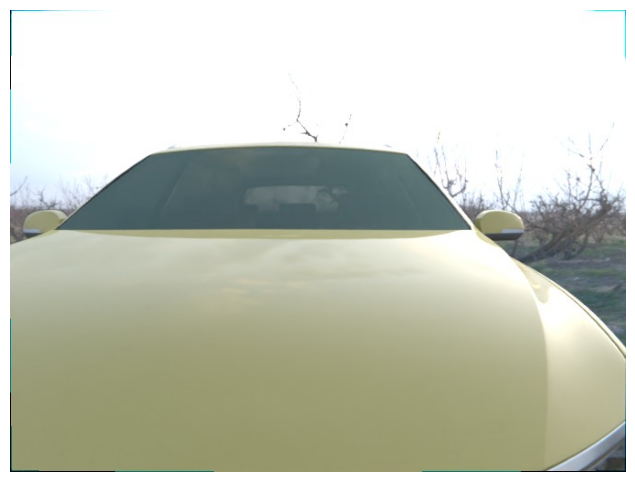

perspective_score_hood          : 0.92222023
perspective_score_backdoor_left : 0.0


In [18]:
show_image('/content/drive/MyDrive/CodingChallenge_v2/imgs/22260ab3-4b19-4fd3-ab75-d68577ce1a35.jpg')

# Approach 2. Segmentation of car parts (visible area of the car-part is an indicator of perspective)
- the area segmented of the back door or hood => area visible
- Car parts segmentation opensource Dataset was used: https://github.com/dsmlr/Car-Parts-Segmentation
- It is the dataset used for training segmentation model.

In [19]:
!pip -qq install -U  segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00


In [20]:
!pip -qq install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

  Preparing metadata (setup.py) ... done


In [ ]:
!git clone https://github.com/dsmlr/Car-Parts-Segmentation.git

Cloning into 'Car-Parts-Segmentation'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (564/564), done.
remote: Compressing objects: 100% (549/549), done.
remote: Total 564 (delta 27), reused 548 (delta 13), pack-reused 0
Receiving objects: 100% (564/564), 24.04 MiB | 26.59 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [25]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
import keras
import tensorflow as tf
import shutil
import re
import albumentations as A

In [26]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [27]:
import segmentation_models as sm


### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [ ]:
coco=COCO('/content/Car-Parts-Segmentation/trainingset/annotations.json')


loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [ ]:
!mkdir /content/Car-Parts-Segmentation/trainingset/annotations/


In [ ]:
I = cv2.imread( '/content/Car-Parts-Segmentation/trainingset/JPEGImages/train302.jpg' )
I.shape

(512, 512, 3)

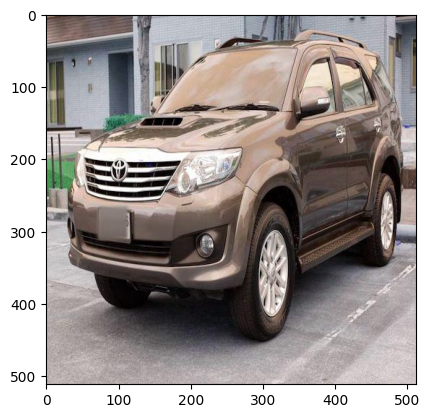

In [ ]:
plt.imshow(I)


In [ ]:
print(f"The categories Ids: {coco.getCatIds()}")

The categories Ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
anno_dir = '/content/Car-Parts-Segmentation/trainingset/annotations/'
img_dir = '/content/Car-Parts-Segmentation/trainingset/JPEGImages/'

def create_label_img(anno_dir, img_dir, coco):
  catIds = coco.getCatIds()
  for im_id in coco.getImgIds():
    img = coco.loadImgs(im_id)[0]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    I = cv2.imread( img_dir + img['file_name'] )
    anns = coco.loadAnns(annIds)
    if isinstance(I, np.ndarray):
      anns_img = np.zeros((I.shape[0], I.shape[1]))
      for i,ann in enumerate(anns):
          if ann['category_id'] != 0:
            anns_img[(coco.annToMask(ann) != 0)] = ann['category_id'] -1
      f_name = img['file_name'].split(".")[0] +'.png'
      cv2.imwrite(anno_dir+ f_name ,anns_img )


create_label_img(anno_dir, img_dir, coco)

In [ ]:
x_train_dir = '/content/Car-Parts-Segmentation/trainingset/JPEGImages/'
y_train_dir = '/content/Car-Parts-Segmentation/trainingset/annotations/'

In [ ]:
!mkdir /content/Car-Parts-Segmentation/valset
!mkdir /content/Car-Parts-Segmentation/valset/JPEGImages
!mkdir /content/Car-Parts-Segmentation/valset/annotations

In [ ]:
source_dir = '/content/Car-Parts-Segmentation/testset/JPEGImages/'
target_dir = '/content/Car-Parts-Segmentation/valset/JPEGImages/'

if len(os.listdir(target_dir )) != 50:
  file_names = os.listdir(source_dir)

  random.shuffle(file_names)

  for file_name in file_names[:50]:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
x_valid_dir = '/content/Car-Parts-Segmentation/valset/JPEGImages/'
y_valid_dir = '/content/Car-Parts-Segmentation/valset/annotations/'

In [ ]:
anno_dir_v = '/content/Car-Parts-Segmentation/valset/annotations/'
img_dir_v = '/content/Car-Parts-Segmentation/valset/JPEGImages/'
coco_v=COCO('/content/Car-Parts-Segmentation/testset/annotations.json')

if len(os.listdir(y_valid_dir))!=50:
  create_label_img(anno_dir_v, img_dir_v, coco_v)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
print('the number of image/label in the train: ',len(os.listdir(x_train_dir)))
print('the number of image/label in the validation: ',len(os.listdir(x_valid_dir)))

the number of image/label in the train:  400
the number of image/label in the validation:  50


In [39]:
c= ['_background_', 'back_bumper', 'back_glass', 'back_left_door','back_left_light',
 'back_right_door', 'back_right_light', 'front_bumper','front_glass',
 'front_left_door',  'front_left_light', 'front_right_door',  'front_right_light',  'hood',  'left_mirror',
 'right_mirror', 'tailgate',  'trunk', 'wheel']

In [ ]:
print(f"Number of Classes: {len(c)}")

Number of Classes: 19


In [ ]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

# helper function for data visualization
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x


# classes for data loading and preprocessing
class Dataset:
    """Dataset. Read images, apply augmentation and preprocessing transformations.

    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing
            (e.g. noralization, shape manipulation, etc.)

    """

    CLASSES = c

    def __init__(
            self,
            images_dir,
            masks_dir,
            classes=None,
            augmentation=None,
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, re.sub(".jpg" , ".png",image_id)) for image_id in self.ids]

        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]

        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):

        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)

        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')

        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.ids)


class Dataloder(tf.keras.utils.Sequence):
    """Load data from dataset and form batches

    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """

    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):

        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        # transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]

        return tuple(batch)

    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [ ]:
# 1 : background
# 2 : back_bumper
# 3 : back_glass
# 4 : back_left_door
# 5 : back_left_light
# 6 : back_right_door
# 7 : back_right_light
# 8 : front_bumper
# 9 : front_glass
# 10 : front_left_door
# 11 : front_left_light
# 12 : front_right_door
# 13 : front_right_light
# 14 : hood
# 15 : left_mirror
# 16 : right_mirror
# 17 : tailgate
# 18 : trunk
# 19 : wheel

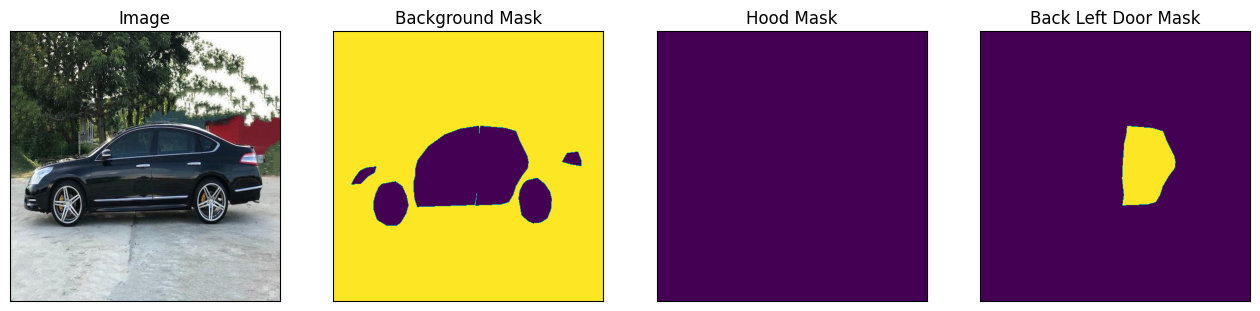

In [ ]:
# Since the interest is on the back door and the front (say hood for now, but subsequently also front glass, bumper)

dataset = Dataset(x_train_dir, y_train_dir, classes=c)

image, mask = dataset[32] # get some sample
visualize(
    image=image,
    background_mask=mask[..., 0].squeeze(),
    hood_mask=mask[..., 13].squeeze(),
    back_left_door_mask=mask[..., 3].squeeze(),
)

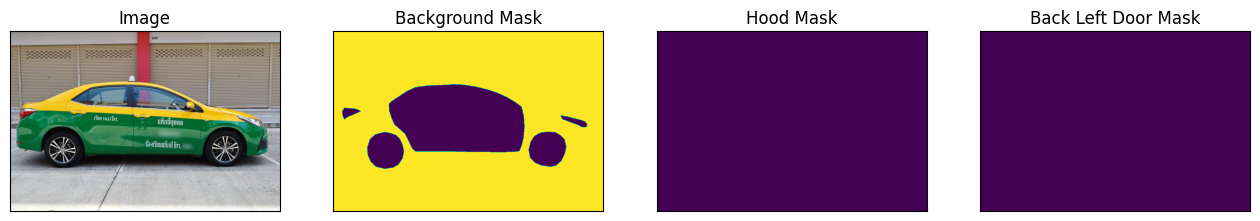

In [ ]:
# Lets look another example of interest
dataset = Dataset(x_valid_dir, y_valid_dir, classes=c)

image, mask = dataset[9] # get some sample
visualize(
    image=image,
    background_mask=mask[..., 0].squeeze(),
    hood_mask=mask[..., 13].squeeze(),
    back_left_door_mask=mask[..., 3].squeeze(),
)

# Augmentations


In [ ]:
def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

# define heavy augmentations
def get_training_augmentation():
    train_transform = [

        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=0.9, border_mode=0),

        A.PadIfNeeded(min_height=512, min_width=512, always_apply=True, border_mode=0),
        A.RandomCrop(height=512, width=512, always_apply=True),

        A.GaussNoise (p=0.2),
        A.Perspective(p=0.5),

        A.OneOf(
            [
                A.CLAHE(p=1),
                A.RandomBrightness(p=1),
                A.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        A.OneOf(
            [
                A.Sharpen(p=1),
                A.Blur(blur_limit=3, p=1),
                A.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

        A.OneOf(
            [
                A.RandomBrightnessContrast(p=1),
                A.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),
        A.Lambda(mask=round_clip_0_1)
    ]
    return A.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        A.LongestMaxSize(max_size=512),
        A.PadIfNeeded(512, 512, value=[0, 0, 0], border_mode=0)
    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform

    Args:
        preprocessing_fn (callbale): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose

    """

    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

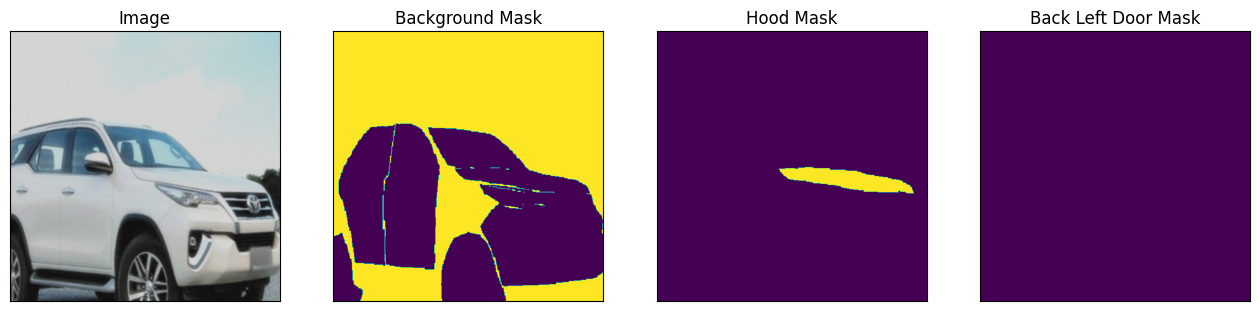

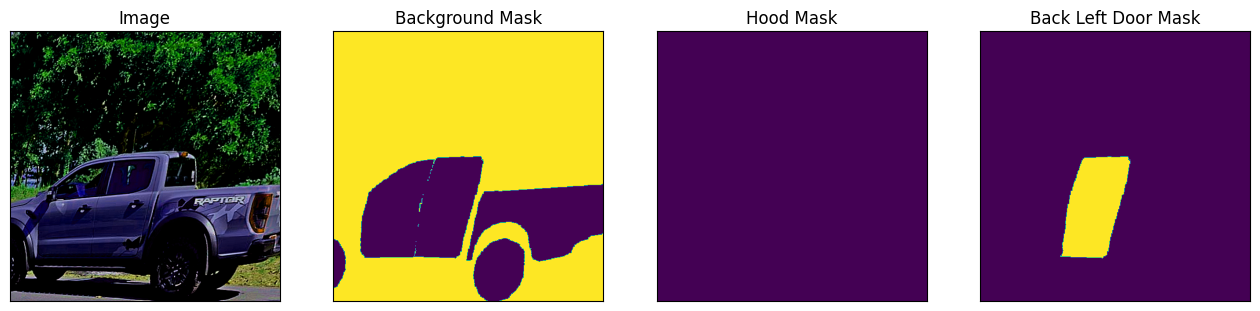

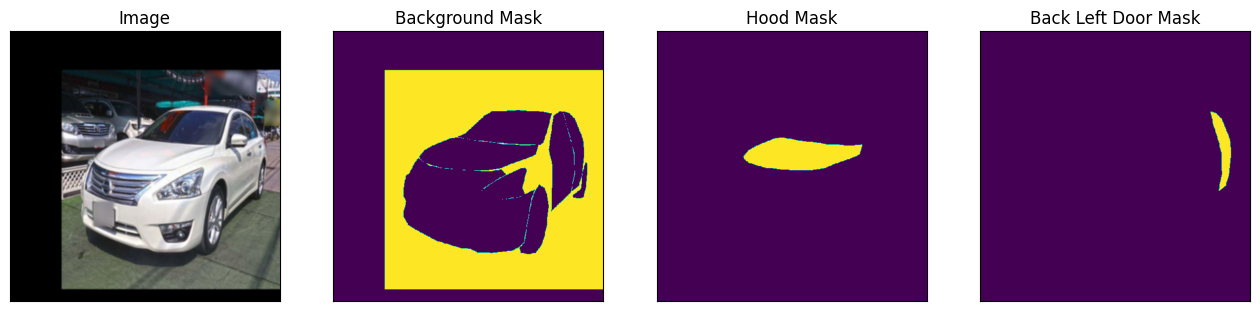

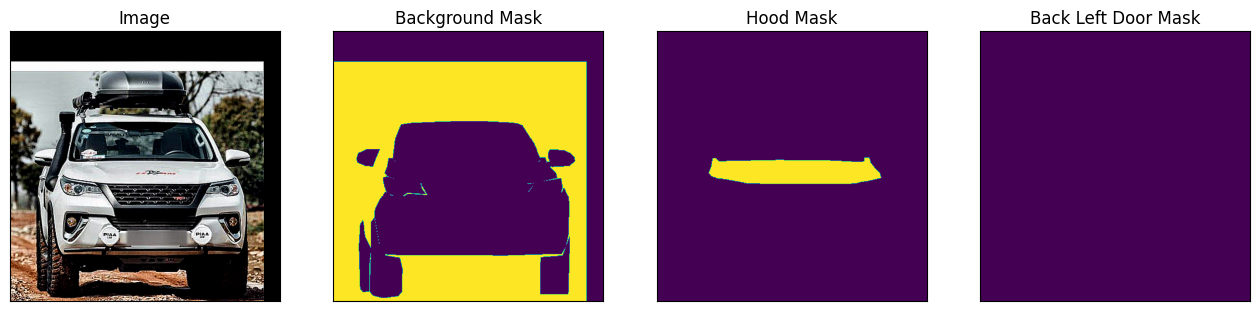

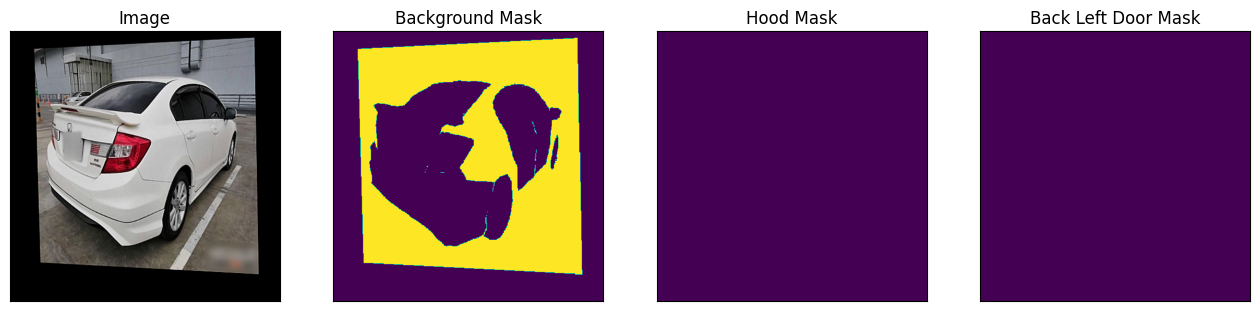

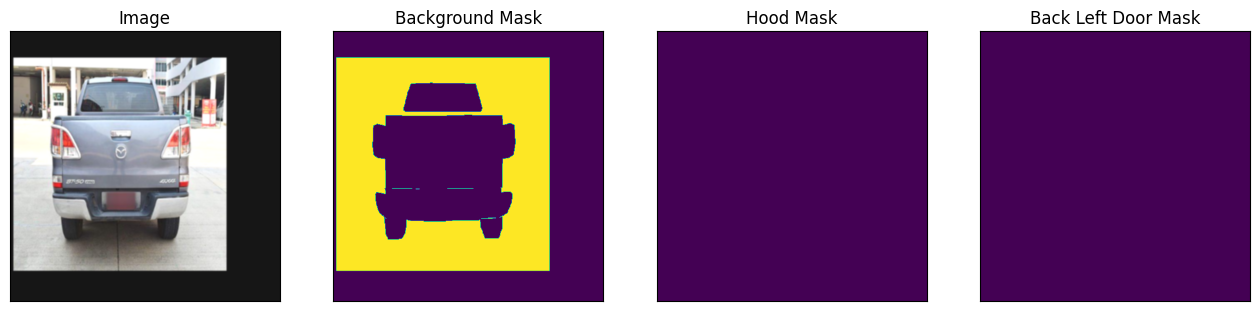

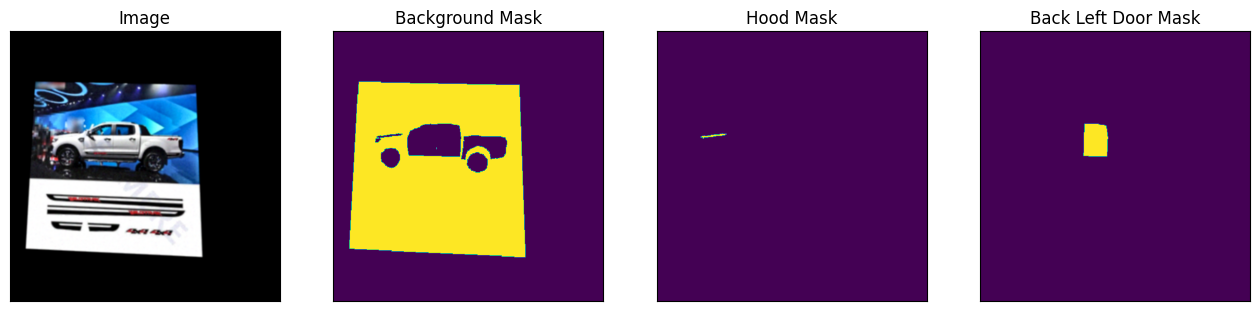

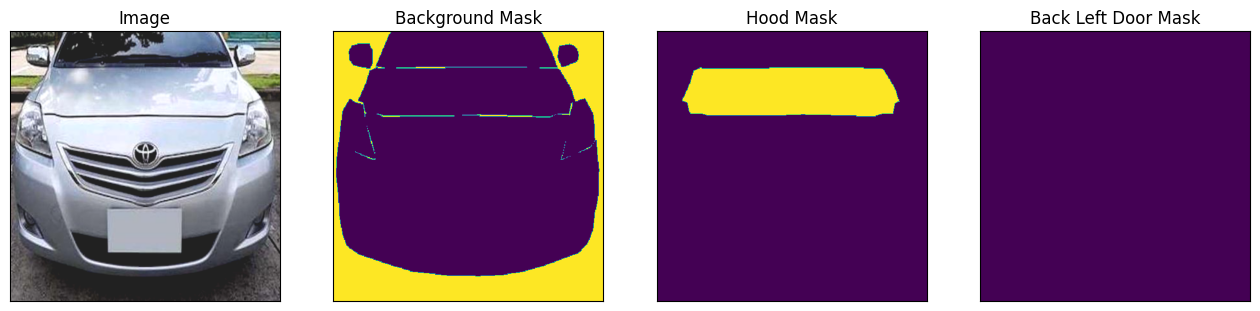

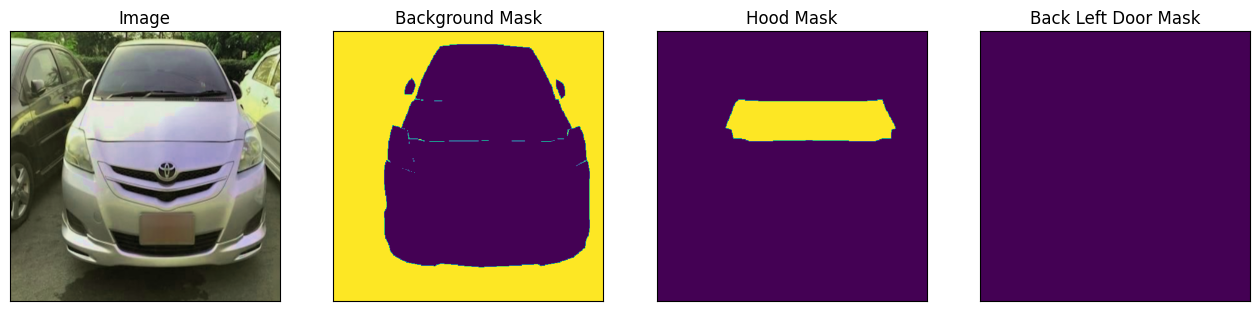

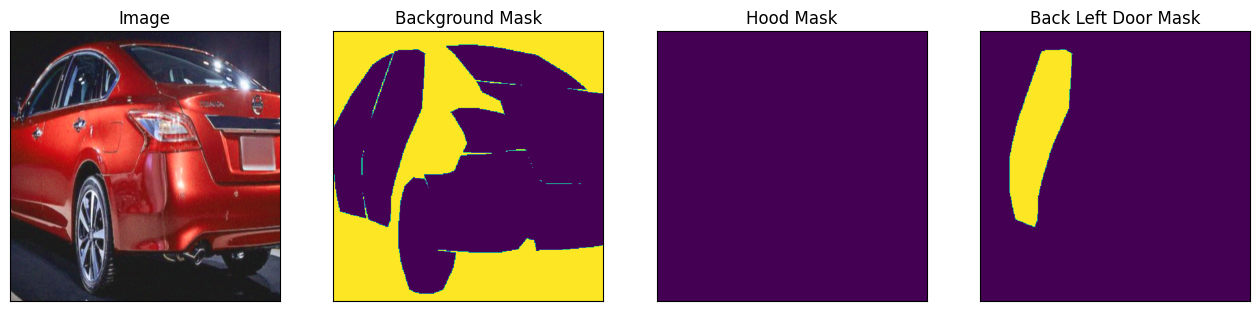

In [ ]:
# Lets look at augmented data: specifically the back left door and the hood

dataset = Dataset(x_train_dir, y_train_dir, classes=c, augmentation=get_training_augmentation())

for i in range(5,15):
  image, mask = dataset[i] # get some sample
  visualize(
      image=image,
      background_mask= mask[..., 0].squeeze(),
      hood_mask=mask[..., 13].squeeze(),
      back_left_door_mask=mask[..., 3].squeeze(),
  )

# Deep Neural Network Modelling for Semantic Segmentation

In [ ]:
sm.set_framework('tf.keras')
sm.framework()

'tf.keras'

In [ ]:
# define network parameters

BACKBONE = 'resnet18'
BATCH_SIZE = 4
CLASSES = c
LR = 0.0002
EPOCHS = 40

preprocess_input = sm.get_preprocessing(BACKBONE)

In [ ]:
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES))  # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'

#create model
model = sm.Unet(BACKBONE, classes=n_classes, activation=activation)

44920640/44920640 [==============================] - 3s 0us/step


In [ ]:
# define optomizer
optim = tf.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.5, 1,1,2,1,2,1,1.5,1.2,2,1,2,1,1.5,1,1,1,1,2]))
focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimizer, loss and metrics
model.compile(optim, total_loss, metrics)


In [ ]:
# Dataset for train images
train_dataset = Dataset(
    x_train_dir,
    y_train_dir,
    classes=CLASSES,
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

# Dataset for validation images
valid_dataset = Dataset(
    x_valid_dir,
    y_valid_dir,
    classes=CLASSES,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)

# check shapes for errors
assert train_dataloader[0][0].shape == (BATCH_SIZE, 512,512, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 512, 512, n_classes)

assert valid_dataloader[0][0].shape == (1, 512,512, 3)
assert valid_dataloader[0][1].shape == (1, 512, 512, n_classes)

# define callbacks for learning rate scheduling and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(),
]

In [ ]:
# train model
history = model.fit(
    train_dataloader,
    steps_per_epoch=len(train_dataloader),
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_data=valid_dataloader,
    validation_steps=len(valid_dataloader),
)

Epoch 1/40
100/100 [==============================] - 131s 1s/step - loss: 0.8997 - iou_score: 0.2136 - f1-score: 0.2384 - val_loss: 0.9078 - val_iou_score: 0.5715 - val_f1-score: 0.5891 - lr: 2.0000e-04
Epoch 2/40
100/100 [==============================] - 112s 1s/step - loss: 0.7590 - iou_score: 0.3020 - f1-score: 0.3414 - val_loss: 0.8145 - val_iou_score: 0.6394 - val_f1-score: 0.6708 - lr: 2.0000e-04
Epoch 3/40
100/100 [==============================] - 108s 1s/step - loss: 0.6581 - iou_score: 0.3542 - f1-score: 0.3983 - val_loss: 0.8906 - val_iou_score: 0.5178 - val_f1-score: 0.5399 - lr: 2.0000e-04
Epoch 4/40
100/100 [==============================] - 105s 1s/step - loss: 0.5718 - iou_score: 0.3719 - f1-score: 0.4207 - val_loss: 0.7624 - val_iou_score: 0.6359 - val_f1-score: 0.6654 - lr: 2.0000e-04
Epoch 5/40
100/100 [==============================] - 105s 1s/step - loss: 0.5188 - iou_score: 0.3806 - f1-score: 0.4277 - val_loss: 0.6804 - val_iou_score: 0.7013 - val_f1-score: 0.73

# Training summary

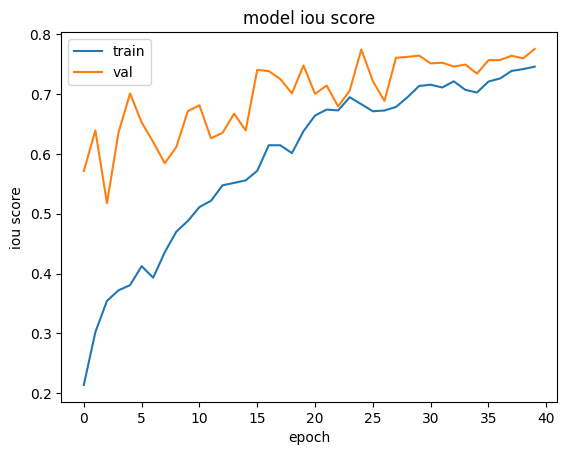

In [ ]:
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('model iou score')
plt.ylabel('iou score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

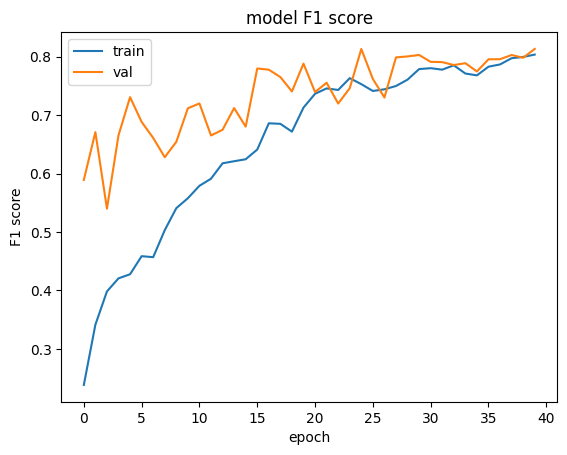

In [ ]:
plt.plot(history.history['f1-score'])
plt.plot(history.history['val_f1-score'])
plt.title('model F1 score')
plt.ylabel('F1 score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

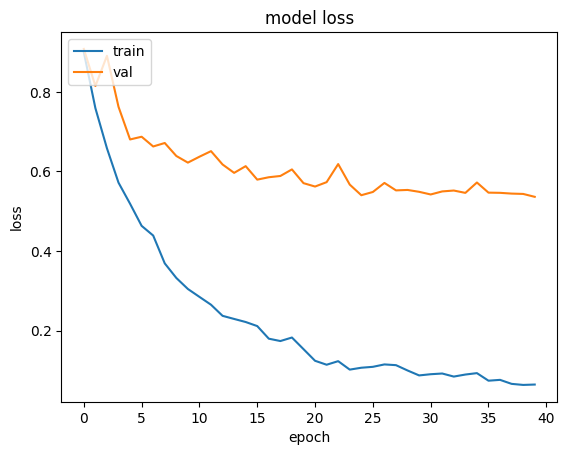

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Reference segmentation section: https://armandolivares.tech/2022/09/09/how-to-train-a-segmentation-model-for-car-parts/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp best_model.h5 /content/drive/My Drive/

cp: target 'Drive/' is not a directory


In [ ]:
import os

# Get the path to your Google Drive
drive_path = os.path.join('/content/drive', 'MyDrive')

# Copy the model weights to Google Drive
!cp best_model.h5 {drive_path}

# Segementation Inference on HUK Coburg Dataset

In [21]:
from PIL import Image
import numpy as np


def preprocess_image(path_img):
  img = Image.open(path_img)
  ww = 512
  hh = 512
  img.thumbnail((hh, ww))
  i = np.array(img)
  ht, wd, cc= i.shape

  # create new image of desired size and color (blue) for padding
  color = (0,0,0)
  result = np.full((hh,ww,cc), color, dtype=np.uint8)

  # copy img image into center of result image
  result[:ht, :wd] = img
  return result, ht, wd

In [22]:
# let us start with 1 image
img_path = '/content/drive/MyDrive/CodingChallenge_v2/imgs/c91a1aa6-9016-4f5d-a841-f8cf2d9bfa75.jpg'

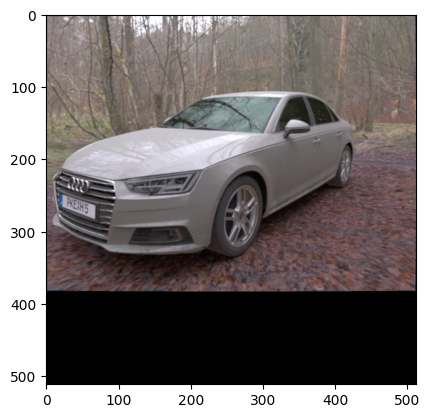

In [23]:
plt.imshow(preprocess_image(img_path)[0])

In [28]:
BACKBONE = 'resnet18'
BATCH_SIZE = 4
LR = 0.0001
EPOCHS = 40
# define network parameters
n_classes = 19
activation =  'softmax'

#create model
model = sm.Unet(BACKBONE, classes=n_classes, activation=activation)

# load best weights
model.load_weights('/content/drive/MyDrive/best_model.h5')


44920640/44920640 [==============================] - 0s 0us/step


1/1 [==============================] - 4s 4s/step


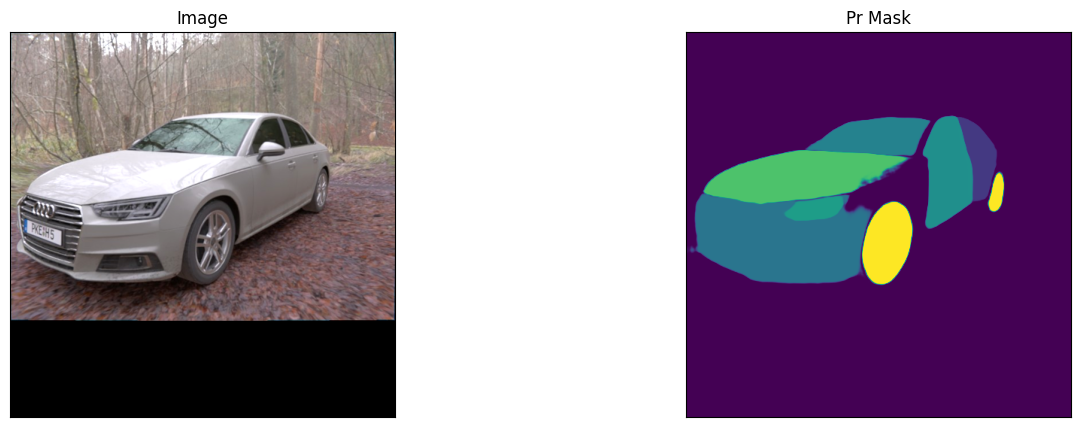

In [29]:
import re

# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

# helper function for data visualization
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

n = 1
for i in range(n):
    image = np.expand_dims(preprocess_image(img_path)[0], axis=0)
    pr_mask = model.predict(image).squeeze()


    pr_mask_gray = np.zeros((pr_mask.shape[0],pr_mask.shape[1]))
    pr_mask_int = np.zeros((pr_mask.shape[0],pr_mask.shape[1]))
    for ii in range(pr_mask.shape[2]):
        pr_mask_gray = pr_mask_gray + 1/pr_mask.shape[2]*ii*pr_mask[:,:,ii]

    visualize(
        image=denormalize(image.squeeze()),
        pr_mask=pr_mask_gray,
    )

In [ ]:
pr_mask.shape

(512, 512, 19)

In [32]:
np.array(feature)

array([2.0490977e+05, 1.0824946e+01, 1.1496979e+00, 3.1069185e+03,
       1.2553188e-01, 7.6718658e-01, 1.4700758e-01, 2.0527961e+04,
       5.7558706e+03, 7.1371167e+03, 1.8409886e+03, 7.4030364e-01,
       5.2521241e-01, 1.2623515e+04, 1.5242456e-01, 4.2752111e-01,
       6.2989717e+00, 3.6850879e+00, 6.2170254e+03], dtype=float32)

In [33]:
'''
calculates segmentation features for each image.
In this case its specifically segmentation area as the first approximation of features,
expected to contain useful information for correlating with perspective scores.
'''
def seg_feature_vector(img_path):
  dir_name = '/content/drive/MyDrive/CodingChallenge_v2/imgs'
  full_img_path = os.path.join(dir_name, img_path)
  # add the full path here and modify next like
  image = np.expand_dims(preprocess_image(full_img_path)[0], axis=0)
  pr_mask = model.predict(image).squeeze() # tensor dimension of (512, 512, 19), which is predicted mask.

  seg_feature = []
  for i in range(19):
    seg_feature.append(np.sum(model.predict(image).squeeze()[:, :, i]))

  return np.array(seg_feature)

In [37]:
df_new = df.copy()
df_new.shape

(4000, 3)

In [35]:
df_new.columns

Index(['filename', 'perspective_score_hood',
       'perspective_score_backdoor_left'],
      dtype='object')

In [ ]:
model_output_cols = c #[f'moadel_output_{i+1}' for i in range(19)]
df_new = df_new.reindex(columns=df.columns.tolist() + model_output_cols)

for index, row in df_new.iterrows():
    # Run the model for the current row
    model_output = seg_feature_vector(row['filename'])

    # Assign the model output to the new columns
    for i, col in enumerate(model_output_cols):
        df_new.at[index, col] = model_output[i]

In [41]:
df_new.to_excel('/content/drive/MyDrive/CodingChallenge_v2/df_segmented_features.xlsx')

In [43]:
import matplotlib.colors as colorsHTML

colors = [ 	(245,255,250), (75,0,130),  (0,255,0), (32,178,170),(0,0,255), (0,255,255), (255,0,255), (128,0,128), (255,140,0),
          (85,107,47), (102,205,170), (0,191,255), (255,0,0), 	(255,228,196), (205,133,63),
          (220,20,60), (255,69,0), 	(143,188,143), (255,255,0)]

In [44]:
def get_legends(class_names, colors, tags):

    n_classes = len(class_names)
    legend = np.zeros(((len(class_names) * 25) + 25, 125, 3),
                      dtype="uint8") + 255

    class_names_colors = enumerate(zip(class_names[:n_classes],
                                       colors[:n_classes]))

    j = 0
    for (i, (class_name, color)) in class_names_colors:
        if i in tags:
          color = [int(c) for c in color]
          cv2.putText(legend, class_name, (5, (j * 25) + 17),
                      cv2.FONT_HERSHEY_COMPLEX, 0.35, (0, 0, 0), 1)
          cv2.rectangle(legend, (100, (j * 25)), (125, (j * 25) + 25),
                        tuple(color), -1)
          j +=1

    return legend

In [45]:
def get_colored_segmentation_image(seg_arr, n_classes, colors=colors):
    output_height = seg_arr.shape[0]
    output_width = seg_arr.shape[1]

    seg_img = np.zeros((output_height, output_width, 3))

    for c in range(n_classes):
        seg_arr_c = seg_arr[:, :] == c
          # print(sum(sum(seg_arr_c)), colors[c] )
        seg_img[:, :, 0] += ((seg_arr_c)*(colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg_arr_c)*(colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg_arr_c)*(colors[c][2])).astype('uint8')

    return seg_img/255

(674, 506)
(674, 506)
1/1 [==============================] - 0s 33ms/step


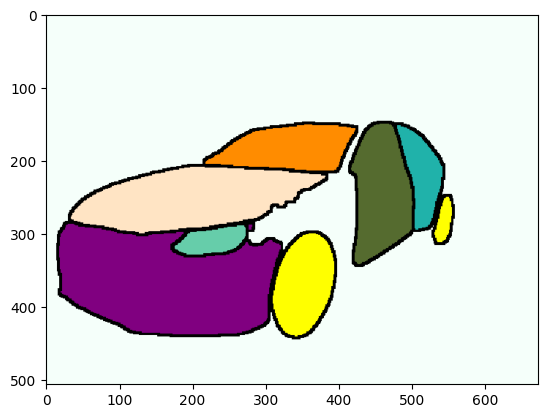

In [46]:
import cv2

img = Image.open(img_path)
tags = []
print(img.size)
img_scaled_arr = preprocess_image(img_path)
print(img.size)
image = np.expand_dims(img_scaled_arr[0], axis=0)
pr_mask = model.predict(image).squeeze()
pr_mask_int = np.zeros((pr_mask.shape[0],pr_mask.shape[1]))
kernel = np.ones((5, 5), 'uint8')
for i in range(1,19):
  array_one = np.round(pr_mask[:,:,i])
  op = cv2.morphologyEx(array_one, cv2.MORPH_OPEN, kernel)
  if sum(sum(op ==1)) > 100:
    tags.append(i)
    pr_mask_int[op ==1] = i

img_segmented = np.array(Image.fromarray(pr_mask_int[:img_scaled_arr[1], :img_scaled_arr[2]]).resize(img.size))


seg = get_colored_segmentation_image(img_segmented, 19, colors=colors)

fused_img = ((np.array(img)/255)/2 + seg/2).astype('float32')

seg = Image.fromarray((seg*255).astype(np.uint8))
fused_img  = Image.fromarray((fused_img *255).astype(np.uint8))
plt.imshow(seg )

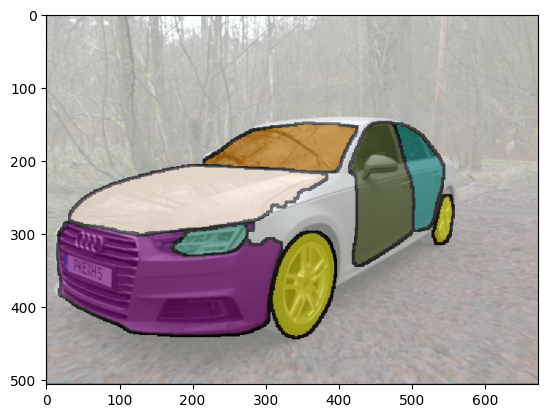

In [47]:

plt.imshow(fused_img )

In [48]:
legend_predicted = get_legends(c, colors, tags)

In [49]:
def concat_lenends(seg_img, legend_img):

    new_h = np.maximum(seg_img.shape[0], legend_img.shape[0])
    new_w = seg_img.shape[1] + legend_img.shape[1]

    out_img = np.zeros((new_h, new_w, 3)).astype('uint8') + legend_img[0, 0, 0]

    out_img[:legend_img.shape[0], :  legend_img.shape[1]] = np.copy(legend_img)
    out_img[:seg_img.shape[0], legend_img.shape[1]:] = np.copy(seg_img)

    return out_img

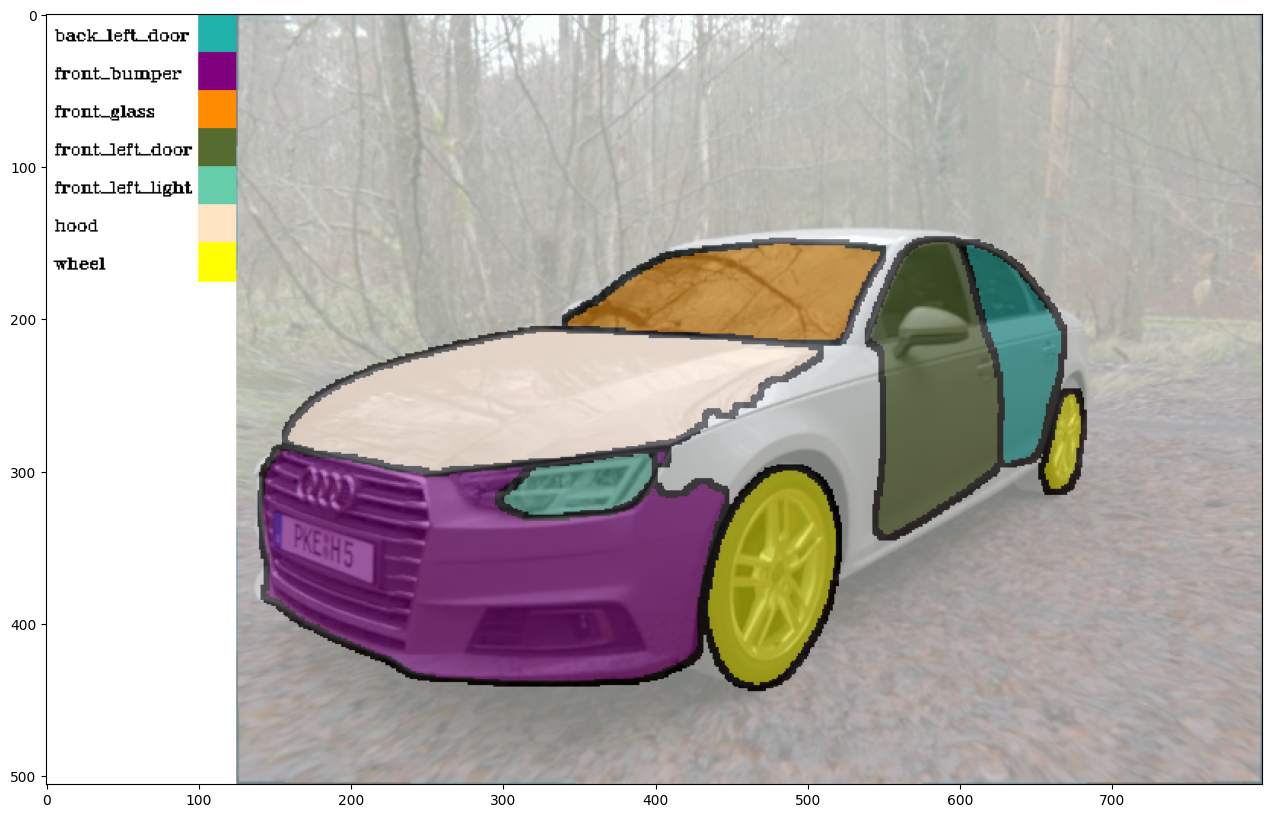

In [50]:
plt.figure(figsize=(20,10))
plt.imshow(concat_lenends(np.array(fused_img), np.array(legend_predicted)))

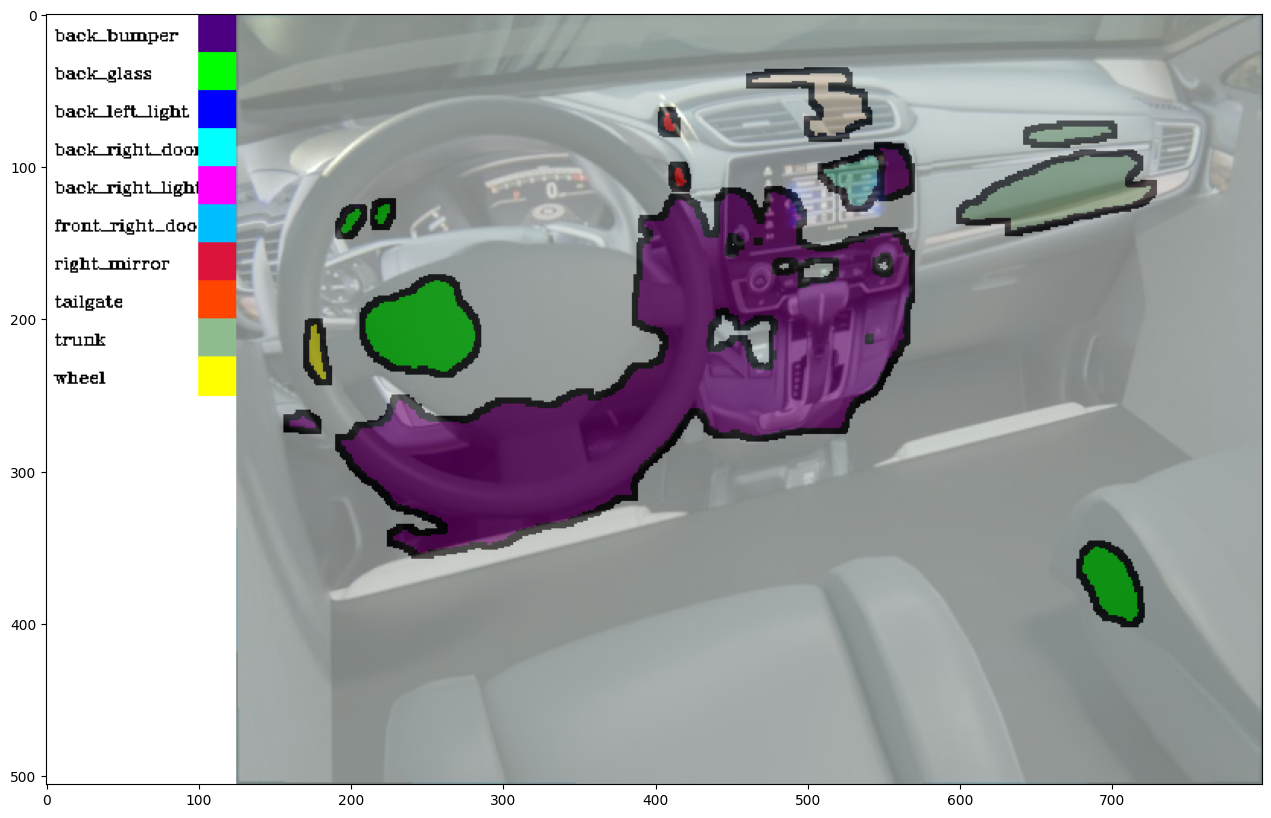

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(concat_lenends(np.array(fused_img), np.array(legend_predicted)))

# Segmentation features as inputs for supervised Machine Learning model

In [4]:
df_ml = pd.read_excel('/content/drive/MyDrive/CodingChallenge_v2/df_segmented_features.xlsx')

In [5]:
from sklearn import model_selection, tree, svm
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor, StackingRegressor

from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from sklearn.cross_validation import KFold

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
df_ml.head()
# earlier pictorial overlay of masks, we saw segmentation has been quite good.

# I also perfromed few sanity checks for numeric values of segmentation features, expressed om the area of parts (on a relative scale)
# and the segmentation appears to be good, on the HUK Coburg test data.

Unnamed: 0                                  filename  \
0           0  66ee2d88-f403-4821-a370-8a3d72e200f9.jpg   
1           1  bf7e237e-f12b-4ffc-8d79-6855cc35ea06.jpg   
2           2  4c297488-c81f-464d-92bf-1c408333a912.jpg   
3           3  6c95ad0b-fda6-42a8-a33d-b430073e1dcd.jpg   
4           4  bd806d94-4c2e-4cd2-8e02-5eaba7c7c63e.jpg   

   perspective_score_hood  perspective_score_backdoor_left   _background_  \
0                 0.27352                         0.439526  210260.656250   
1                 0.00000                         0.902682  194304.906250   
2                 0.00000                         0.900864  216826.750000   
3                 0.00000                         0.213162  255823.484375   
4                 0.00000                         0.818388  202746.703125   

    back_bumper   back_glass  back_left_door  back_left_light  \
0     25.160250    18.846378     4149.232910         0.245813   
1   3817.946045  4010.097168    18442.833984      1325.449097   
2  11555.004883  6564.810059     7038.458008      2835.072266   
3     58.452713    29.843260        0.726474         0.208621   
4  18143.890625  8069.548828     7814.120605      2253.555908   

   back_right_door  ...  front_left_door  front_left_light  front_right_door  \
0         3.644064  ...     12420.181641       1642.699219          0.896238   
1        78.820000  ...     10992.451172          1.033953        207.419937   
2         2.424790  ...      3734.537354          0.362550          1.204041   
3       909.547729  ...         3.592238          0.254712        302.995728   
4        18.957508  ...      4024.494141          0.319511          2.125674   

   front_right_light        hood  left_mirror  right_mirror     tailgate  \
0           1.229003  201.815598     0.126627      0.395368    21.763897   
1           1.637372   11.239563     0.130876      0.305624    28.879486   
2           0.294895    1.644600     0.095470      0.310233  4111.093750   
3           0.335542    4.903084     0.102976     82.718895     4.578559   
4           0.394602    1.652180     0.108993      0.366628  1162.449219   

          trunk         wheel  
0   1141.950562  16225.184570  
1     36.886307   1113.361694  
2   4510.328125   4648.173828  
3     39.411217   4876.347168  
4  11322.587891   6486.580078  

[5 rows x 23 columns]

In [7]:
df_ml.columns

Index(['Unnamed: 0', 'filename', 'perspective_score_hood',
       'perspective_score_backdoor_left', '_background_', 'back_bumper',
       'back_glass', 'back_left_door', 'back_left_light', 'back_right_door',
       'back_right_light', 'front_bumper', 'front_glass', 'front_left_door',
       'front_left_light', 'front_right_door', 'front_right_light', 'hood',
       'left_mirror', 'right_mirror', 'tailgate', 'trunk', 'wheel'],
      dtype='object')

In [7]:
# split_location = 4000
X = df_ml.iloc[:, 5:22].values
y1 = df_ml.iloc[:, 2].values
y2 = df_ml.iloc[:, 3].values

#### All segmentation features used for ML model training (features indicate segmentation area in the 512x512 px area)



In [12]:
validation_size = 0.25
# seed = 42
X_train, X_test, y1_train, y1_test = model_selection.train_test_split(
    X, y1, test_size=validation_size, shuffle=True)

X_train, X_test, y2_train, y2_test = model_selection.train_test_split(
    X, y2, test_size=validation_size, shuffle=True)

In [32]:
reg_RF = RandomForestRegressor(n_estimators=100, max_depth=100)

### perspective_score_hood

In [66]:
def regressor_performance(reg, X, y=y1):

  X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, shuffle=True)


  predictor = reg.fit(X_train, y_train)
  y_test_pred = predictor.predict(X_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  mae = mean_absolute_error(y_test, y_test_pred)

  print("RMSE: %f" % (rmse))
  print("MAE: %f" % (mae))

  return y_test, y_test_pred

# y1_test, y1_test_pred = regressor_performance(reg_RF, X,y1)

In [67]:
y1_test, y1_test_pred = regressor_performance(reg_RF, X,y1)
# results with Random forest regressor

RMSE: 0.125856
MAE: 0.066766


In [68]:
y1_test_pred.max()

0.9136208302999992

In [69]:
y1_test_pred.min()

0.0

In [46]:
def scatter_plot(ground_truth, predictions):
  # Create the scatter plot
  plt.figure(figsize=(6, 6))

  plt.scatter(ground_truth, ground_truth, color='red', s=50)
  plt.scatter(ground_truth, predictions, color='blue', s=50)

  plt.xlabel('Ground Truth')
  plt.ylabel('Predictions')
  plt.title('predicted vs ground truth')

  # Add a diagonal line
  plt.plot([ground_truth.min(), ground_truth.max()], [ground_truth.min(), ground_truth.max()], 'k--', lw=2)

  # Show the plot
  plt.show()

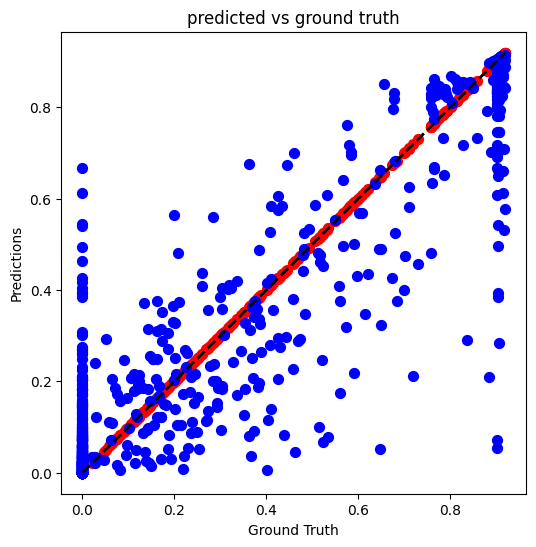

In [71]:
scatter_plot(y1_test, y1_test_pred)

### perspective_score_back door

In [72]:
y2_test, y2_test_pred = regressor_performance(reg_RF, X,y2)

RMSE: 0.166336
MAE: 0.084336


In [73]:
y2_test_pred.max()

0.9138320674000007

In [74]:
y2_test_pred.min()

0.0

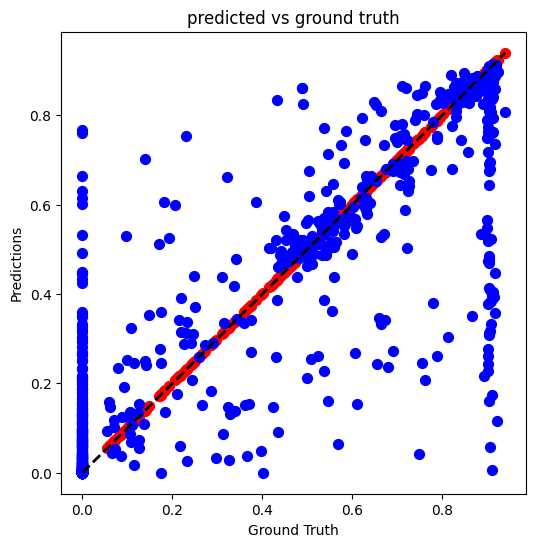

In [75]:
scatter_plot(y2_test, y2_test_pred)

###**Further improvement 1**

- divide the area of parts by the total car area segmented. This prevents any car size difference
- if back trunk and back bumper have very high area, compared to front hood and front bumper => front perspective score would be zero
- aspect ratio of front and back tyre in the mask indicate a difference in the perspective scores
- front door vs back door area




In [ ]:
 # 'front_bumper', 'front_glass', 'hood' # 'back_bumper','back_glass', 'tailgate', 'trunk' #
# use this for y1

In [ ]:
# 'back_left_door', 'back_left_light'  # 'front_left_door', 'front_left_light', 'left_mirror'
# 'back_right_door','back_right_light', 'front_right_light', 'right_mirror'
# use this for y2

In [8]:
df_ml['car'] = df_ml.loc[:, 'back_bumper':'wheel'].sum(axis=1)

In [9]:
df_ml['front_area'] = df_ml['front_bumper'] + df_ml['front_glass'] + df_ml['hood']

In [10]:
df_ml['back_area'] = df_ml['back_bumper'] + df_ml['back_glass'] + df_ml['tailgate'] +  df_ml['trunk']

In [11]:
df_ml['front_areafraction_frontback']= (df_ml['front_area']/(df_ml['front_area'] + df_ml['back_area']))

In [12]:
df_ml['front_areafraction_car']= df_ml['front_area']/df_ml['car']

In [13]:
df_ml['backleftdoor_areafraction_leftview'] = (df_ml['back_left_door']/(df_ml['back_left_door'] + df_ml['back_right_door']))

In [14]:
df_ml['backleftdoor_areafraction_bothbackdoors']= (df_ml['back_left_door']/(df_ml['back_left_door'] + df_ml['back_right_door']))

In [15]:
df_ml['backleftdoor_areafraction_car'] = df_ml['back_left_door']/df_ml['car']

In [16]:
df_ml.columns

Index(['Unnamed: 0', 'filename', 'perspective_score_hood',
       'perspective_score_backdoor_left', '_background_', 'back_bumper',
       'back_glass', 'back_left_door', 'back_left_light', 'back_right_door',
       'back_right_light', 'front_bumper', 'front_glass', 'front_left_door',
       'front_left_light', 'front_right_door', 'front_right_light', 'hood',
       'left_mirror', 'right_mirror', 'tailgate', 'trunk', 'wheel', 'car',
       'front_area', 'back_area', 'front_areafraction_frontback',
       'front_areafraction_car', 'backleftdoor_areafraction_leftview',
       'backleftdoor_areafraction_bothbackdoors',
       'backleftdoor_areafraction_car'],
      dtype='object')

In [49]:
df_ml1 = df_ml.copy() # for perspective hood score

In [50]:
df_ml1.loc[:, 'back_bumper':'wheel'] = df_ml1.loc[:,'back_bumper':'wheel'].div(df_ml1.loc[:, 'car'], axis=0)

In [51]:
df_ml1 = df_ml1.drop(['car', 'front_area','back_area'], axis=1)

In [52]:
df_ml2 = df_ml1.copy()
# ml1 for hood score
# ml2 for back side door score

In [53]:
df_ml1 = df_ml1.drop(['wheel','backleftdoor_areafraction_leftview', 'backleftdoor_areafraction_bothbackdoors', 'backleftdoor_areafraction_car'], axis=1)

In [55]:
df_ml1.columns

Index(['Unnamed: 0', 'filename', 'perspective_score_hood',
       'perspective_score_backdoor_left', '_background_', 'back_bumper',
       'back_glass', 'back_left_door', 'back_left_light', 'back_right_door',
       'back_right_light', 'front_bumper', 'front_glass', 'front_left_door',
       'front_left_light', 'front_right_door', 'front_right_light', 'hood',
       'left_mirror', 'right_mirror', 'tailgate', 'trunk',
       'front_areafraction_frontback', 'front_areafraction_car'],
      dtype='object')

In [54]:
df_ml2.drop(['front_areafraction_frontback', 'front_areafraction_car', 'wheel'], axis=1, inplace=True)

In [56]:
df_ml2.columns

Index(['Unnamed: 0', 'filename', 'perspective_score_hood',
       'perspective_score_backdoor_left', '_background_', 'back_bumper',
       'back_glass', 'back_left_door', 'back_left_light', 'back_right_door',
       'back_right_light', 'front_bumper', 'front_glass', 'front_left_door',
       'front_left_light', 'front_right_door', 'front_right_light', 'hood',
       'left_mirror', 'right_mirror', 'tailgate', 'trunk',
       'backleftdoor_areafraction_leftview',
       'backleftdoor_areafraction_bothbackdoors',
       'backleftdoor_areafraction_car'],
      dtype='object')

In [59]:
X1 = df_ml1.iloc[:, 5:25].values
X2 = df_ml2.iloc[:, 5:26].values
y1 = df_ml1.iloc[:, 2].values
y2 = df_ml1.iloc[:, 3].values

In [29]:
def regressor_performance(reg, X, y=y1):

  X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, shuffle=True)

  predictor = reg.fit(X_train, y_train)
  y_test_pred = predictor.predict(X_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  mae = mean_absolute_error(y_test, y_test_pred)

  print("RMSE: %f" % (rmse))
  print("MAE: %f" % (mae))

  return y_test, y_test_pred

# y1_test, y1_test_pred = regressor_performance(reg_RF, X,y1)

In [63]:
y1_test, y1_test_pred = regressor_performance(reg_RF, X1,y1)

RMSE: 0.121071
MAE: 0.067153


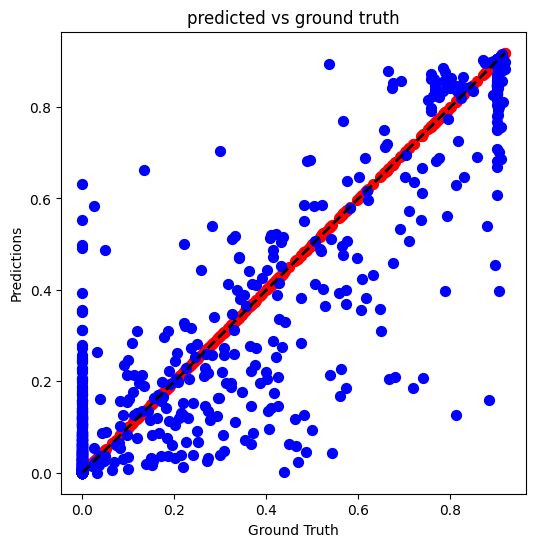

In [64]:
scatter_plot(y1_test, y1_test_pred)

In [66]:
y2_test, y2_test_pred = regressor_performance(reg_RF, X2,y2)

RMSE: 0.167346
MAE: 0.083350


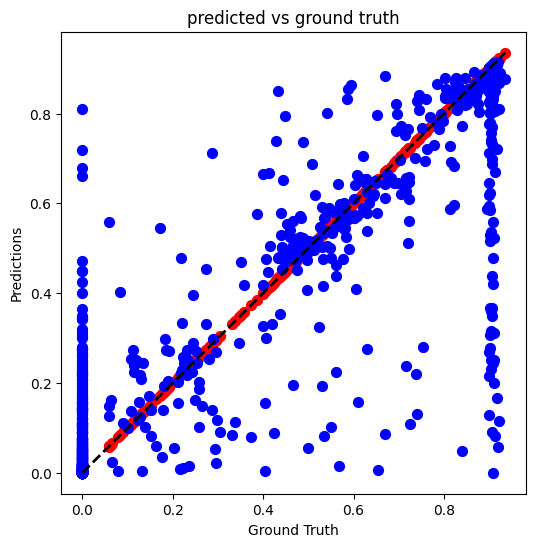

In [67]:
scatter_plot(y2_test, y2_test_pred)

###**Further improvement 2**
- we see many mis-predictions near score of 0 or 1
- the main reason for this could be that the images of car from inside.
- use boundary length of the segmented parts. If area of segmented parts/boundary_length is high for a different car parts compared in an image, compared to those for external car images  
- example with high ratio: refer the cell immediately above segmented overlay images seen (refer the cell above the section with title 'Segmentation features as inputs for supervised Machine Learning model')
